In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

<input type="checkbox" checked disabled> Euclidean distance<br>
<input type="checkbox" checked disabled> KNN from scratch<br>
<input type="checkbox" checked disabled> KNN - Math<br>
<input type="checkbox" checked disabled> Test KNN - Breast Cancer Wisconsin (Diagnostic) Data Set <br>
<input type="checkbox" disabled> Test KNN - Credit_base<br>
<input type="checkbox" disabled> KNN - 10 NN - Adult_income

In [ ]:
data = pd.read_csv("data.csv")

X = data.drop(columns=['id', 'diagnosis']).values
y = data['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [26]:
data_original = pd.read_csv("data.csv")

missing_values_count = data_original.isnull().sum()
print("Contagem de valores ausentes por coluna:\n", missing_values_count[missing_values_count > 0])

if 'Unnamed: 32' in data_original.columns:
    data_cleaned = data_original.drop(columns=['Unnamed: 32'])
else:
    data_cleaned = data_original.copy()
    
data_cleaned = data_cleaned.dropna()

X = data_cleaned.drop(columns=['id', 'diagnosis']).values
y = data_cleaned['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


Contagem de valores ausentes por coluna:
 Unnamed: 32    569
dtype: int64


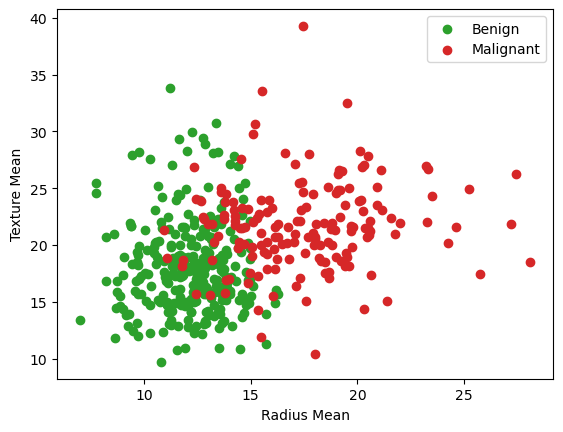

In [27]:
plt.scatter(X_train[y_train == 'B', 0], X_train[y_train == 'B', 1], color='tab:green', label='Benign')
plt.scatter(X_train[y_train == 'M', 0], X_train[y_train == 'M', 1], color='tab:red', label='Malignant')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()

In [28]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((b - a) ** 2))

In [29]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, new_points):
        predictions = [self.predict_class(new_point) for new_point in new_points]
        return np.array(predictions)
    
    def predict_class(self, new_point):
        distances = [euclidean_distance(point, new_point) for point in self.X_train]

        k_nearest_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

        most_common = Counter(k_nearest_labels).most_common(1)[0][0]

        return most_common

In [30]:
knn = KNN(7)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = np.mean(predictions == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 92.98%


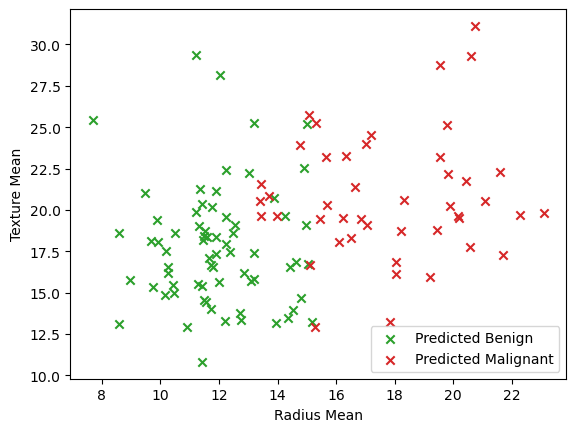

In [31]:
plt.scatter(X_test[predictions == 'B', 0], X_test[predictions == 'B', 1], color='tab:green', label='Predicted Benign', marker='x')
plt.scatter(X_test[predictions == 'M', 0], X_test[predictions == 'M', 1], color='tab:red', label='Predicted Malignant', marker='x')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()